In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('student-scores.csv')
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


# EDA (Exploratoty Data Analysis)

### Understand the Dataset

In [5]:
df.shape

(2000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [9]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [11]:
# See if the dataset contains missing values
df.isna().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [13]:
# See if the dataset contains duplicates
df.duplicated().sum()

0

### Feature Engineering

In [15]:
# Create a new column 'Avg_Score' which represents the total average score of the student
df['Avg_Score'] = (df['math_score']+df['history_score']+df['physics_score']+df['chemistry_score']+df['biology_score']+df['english_score']+df['geography_score'])/7
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Avg_Score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,79.714286
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,76.285714
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,82.571429
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,80.857143


In [17]:
# Now we don't need these columns
df = df.drop(['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score'],axis=1)
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,Avg_Score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,74.428571
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,79.714286
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,76.285714
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,82.571429
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,80.857143


### Exploring Categorical Columns

In [19]:
# As we see, there is no incomprehensible values in this column
df['gender'].value_counts()

gender
female    1002
male       998
Name: count, dtype: int64

In [21]:
# As we see, there is no incomprehensible values in this column
df['part_time_job'].value_counts()

part_time_job
False    1684
True      316
Name: count, dtype: int64

In [23]:
# As we see, there is no incomprehensible values in this column
df['extracurricular_activities'].value_counts()

extracurricular_activities
False    1592
True      408
Name: count, dtype: int64

In [25]:
# Remove the Unknown values as they will be useless
df['career_aspiration'].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

### Exploring Numerical Columns

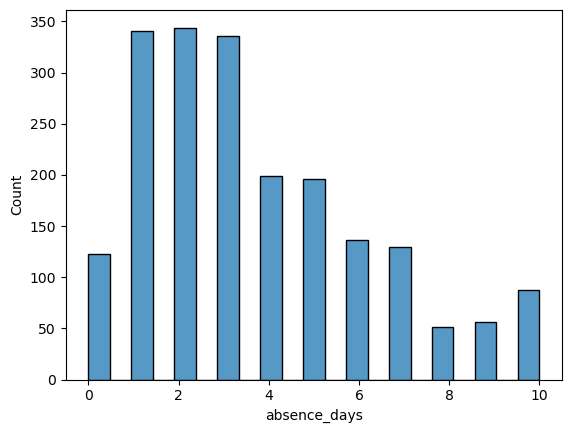

In [27]:
# According to the gragh There is no unrealistic values in this column
sns.histplot(df['absence_days'])
plt.show()

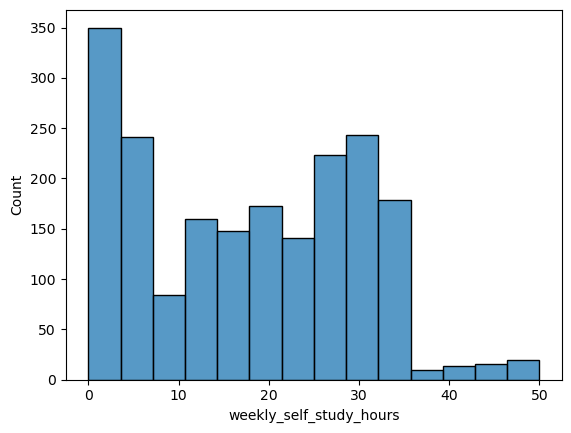

In [29]:
# According to the gragh There is no unrealistic values in this column
sns.histplot(df['weekly_self_study_hours'])
plt.show()

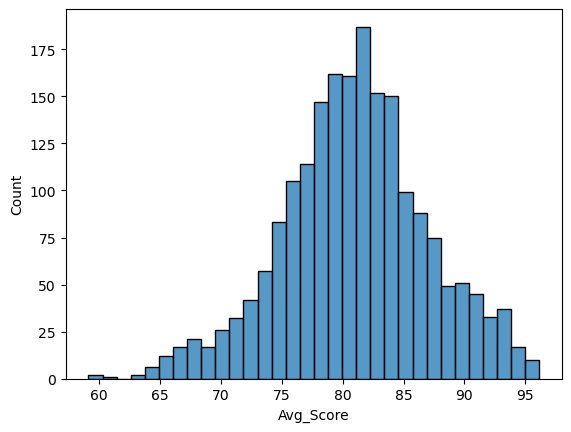

In [31]:
# According to the gragh There is no unrealistic values in this column
sns.histplot(df['Avg_Score'])
plt.show()

### Detecting Outliers

In [33]:
df.describe()

,id,absence_days,weekly_self_study_hours,Avg_Score
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,80.980357
std,577.494589,2.629271,12.129604,6.042224
min,1.000000,0.000000,0.000000,59.142857
25%,500.750000,2.000000,5.000000,77.285714
50%,1000.500000,3.000000,18.000000,81.000000
75%,1500.250000,5.000000,28.000000,84.714286
max,2000.000000,10.000000,50.000000,96.142857


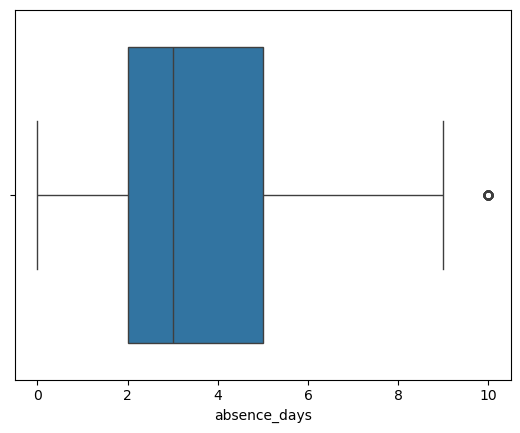

In [35]:
# it seems that the 'absence_days' column contains outliers
sns.boxplot(x=df['absence_days'])
plt.show()

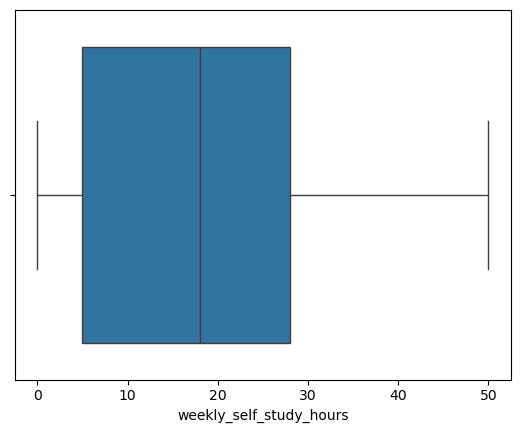

In [37]:
# it seems that the 'weekly_self_study_hours' column doesn't appears that it contains outliers
sns.boxplot(x=df['weekly_self_study_hours'])
plt.show()

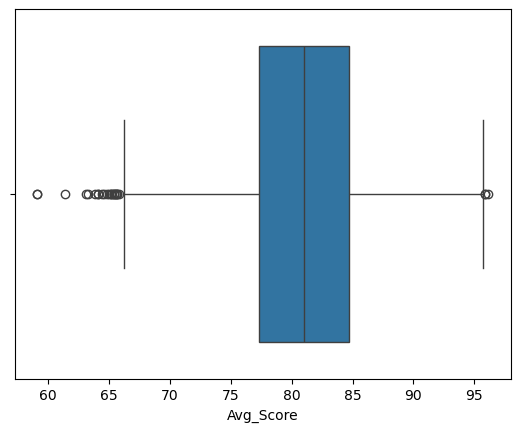

In [39]:
# it seems that the 'weekly_self_study_hours' column contains outliers
sns.boxplot(x=df['Avg_Score'])
plt.show()

### Detect Relationships between features and the label

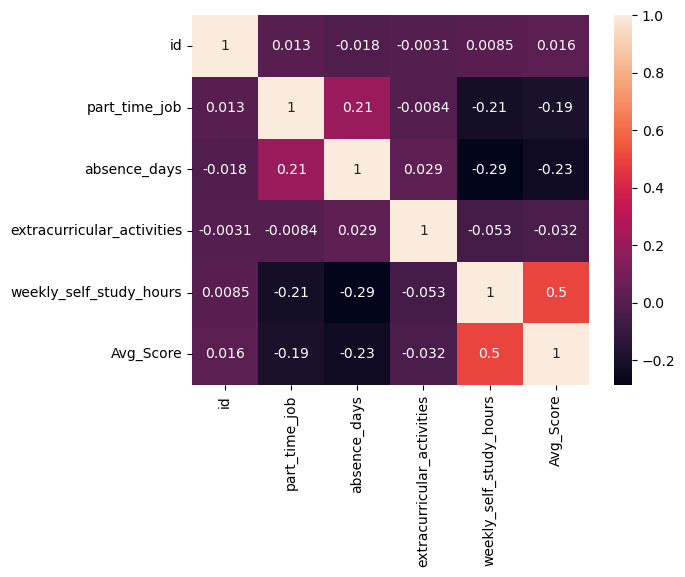

In [41]:
# As we see from all the numerical columns only the 'weekly_self_study_hours' has a positive relationship with the label 'Avg_Score'
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [43]:
corr = df["weekly_self_study_hours"].corr(df["Avg_Score"])
print("Correlation:", corr)

Correlation: 0.5015199798379675


In [45]:
# According to the ANOVA test, the 'career_aspiration' column has a relationship with the label 'Avg_Score'
groups = [df[df["career_aspiration"] == c]["Avg_Score"] for c in df["career_aspiration"].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 72.82782967522311
p-value: 1.6905281094183065e-185


# Data Preprocessing

### Data Cleaning

In [47]:
# Removing the rows that have Unknown carrer aspiration
df = df[df['career_aspiration'] != 'Unknown']
df['career_aspiration'].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

In [49]:
df.shape

(1777, 11)

### Handling Outliers

In [51]:
# Robust Scaling for handling outliers in 'Avg_Score'
median = df['Avg_Score'].median()
q1 = df['Avg_Score'].quantile(0.25)
q3 = df['Avg_Score'].quantile(0.75)
IQR = q3 - q1
df['Scaled_Avg_Score'] = (df['Avg_Score'] - median)/IQR

C:\Users\20106\AppData\Local\Temp\ipykernel_23996\2050518832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scaled_Avg_Score'] = (df['Avg_Score'] - median)/IQR


In [53]:
# Robust Scaling for handling outliers in 'absence_days'
median = df['absence_days'].median()
q1 = df['absence_days'].quantile(0.25)
q3 = df['absence_days'].quantile(0.75)
IQR = q3 - q1
df['Scaled_absence_days'] = (df['absence_days'] - median)/IQR

C:\Users\20106\AppData\Local\Temp\ipykernel_23996\4280790516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scaled_absence_days'] = (df['absence_days'] - median)/IQR


In [55]:
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,Avg_Score,Scaled_Avg_Score,Scaled_absence_days
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,82.000000,0.094340,0.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,91.428571,1.339623,-0.333333
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,86.428571,0.679245,2.000000
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,78.714286,-0.339623,0.666667
6,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,male,False,3,True,23,Software Engineer,84.714286,0.452830,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,79.714286,-0.207547,-0.333333
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,76.285714,-0.660377,-0.333333
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,82.571429,0.169811,0.666667
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,80.857143,-0.056604,2.333333


### Encoding

In [57]:
# Label Encoding for 'career_aspiration' as it will be used in the training process
encoder = LabelEncoder()
df['career_aspiration_encoded'] = encoder.fit_transform(df['career_aspiration'])
df

C:\Users\20106\AppData\Local\Temp\ipykernel_23996\3870000554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['career_aspiration_encoded'] = encoder.fit_transform(df['career_aspiration'])


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,Avg_Score,Scaled_Avg_Score,Scaled_absence_days,career_aspiration_encoded
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,82.000000,0.094340,0.000000,9
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,91.428571,1.339623,-0.333333,6
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,86.428571,0.679245,2.000000,8
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,78.714286,-0.339623,0.666667,1
6,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,male,False,3,True,23,Software Engineer,84.714286,0.452830,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,79.714286,-0.207547,-0.333333,4
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,76.285714,-0.660377,-0.333333,12
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,82.571429,0.169811,0.666667,12
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,80.857143,-0.056604,2.333333,3


### Feature Scaling

In [60]:
"""I will use the 'weekly_self_study_hours' feature in the training process so I have
to scale it also as I scaled the 'Avg_Score' feature because of Gradient Descent sensitivity"""

median = df['weekly_self_study_hours'].median()
q1 = df['weekly_self_study_hours'].quantile(0.25)
q3 = df['weekly_self_study_hours'].quantile(0.75)
IQR = q3 - q1
df['scaled_weekly_self_study_hours'] = (df['weekly_self_study_hours'] - median)/IQR
df

C:\Users\20106\AppData\Local\Temp\ipykernel_23996\3354200704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_weekly_self_study_hours'] = (df['weekly_self_study_hours'] - median)/IQR


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,Avg_Score,Scaled_Avg_Score,Scaled_absence_days,career_aspiration_encoded,scaled_weekly_self_study_hours
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,82.000000,0.094340,0.000000,9,0.391304
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,91.428571,1.339623,-0.333333,6,1.260870
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,86.428571,0.679245,2.000000,8,-0.217391
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,78.714286,-0.339623,0.666667,1,-0.652174
6,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,male,False,3,True,23,Software Engineer,84.714286,0.452830,0.000000,12,0.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,79.714286,-0.207547,-0.333333,4,0.521739
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,76.285714,-0.660377,-0.333333,12,0.086957
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,82.571429,0.169811,0.666667,12,-0.173913
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,80.857143,-0.056604,2.333333,3,-0.565217


### Preparing the data for the the model training

In [62]:
x1 = np.array(df['scaled_weekly_self_study_hours'])
x2 = np.array(df['career_aspiration_encoded'])
#Horizontally stacking x1 and x2 as 2 columns in the new array x
x = np.stack((x1,x2),axis=1)
y = np.array(df['Scaled_Avg_Score'])

In [64]:
x.shape

(1777, 2)

In [66]:
y.shape

(1777,)

In [68]:
#Splitting the data into 2 groups training and testing
x_train = x[:1300]
x_test = x[1300:]
print(x_train.shape)
x_test.shape

(1300, 2)


(477, 2)

In [70]:
y_train = y[:1300]
y_test = y[1300:]
print(y_train.shape)
y_test.shape

(1300,)


(477,)

# Linear Regression

### Model Implementation

In [72]:
# Implementation of the Mean Squared Error cost function for linear regression
def Linear_mse(w,b,x,y):
    prediction = np.zeros(y.size)
    for i in range(prediction.size):
        prediction[i] = np.dot(w,x[i]) + b
    return (((prediction-y)**2).mean())/2

In [74]:
# Implementation of the gradient descent algorithm for linear regression
def Linear_gradient_descent(w,b,x,y,learning_rate):
    temp_w = np.zeros(w.size)
    for j in range(w.size):
        sum1 = 0
        for i in range(x.shape[0]):
            sum1 += ((np.dot(w,x[i]) + b - y[i])*x[i][j])
        derevative_w = (1/x.shape[0]) * sum1
        temp_w[j] = w[j] - (learning_rate*derevative_w) 
    
    sum2 = 0
    for i in range(x.shape[0]):
        sum2 += (np.dot(w,x[i]) + b - y[i])
    derevative_b = (1/x.shape[0]) * sum2
    temp_b = b - (learning_rate*derevative_b) 

    w = temp_w
    b = temp_b
    return w,b

In [76]:
# Implementation of the linear regression algorithm
def LinearRegression(x,y,epochs,learning_rate):
    w = np.zeros(x.shape[1])
    b = 0
    cost = np.zeros(epochs)
    for i in range(epochs):
        w, b = Linear_gradient_descent(w,b,x,y,learning_rate)
        cost[i] = Linear_mse(w,b,x,y)
    final_predictions = np.zeros(y.size)
    for i in range(y.size):
        final_predictions[i] = np.dot(w,x[i]) + b
    return w,b,cost,final_predictions

### Training the Model

In [78]:
# linear regression model
epochs = 6000
learning_rate = 0.001
w,b,cost,final_predictions = LinearRegression(x_train,y_train,epochs,learning_rate)
print(f'The model took {epochs} epochs to be trained')

The model took 6000 epochs to be trained


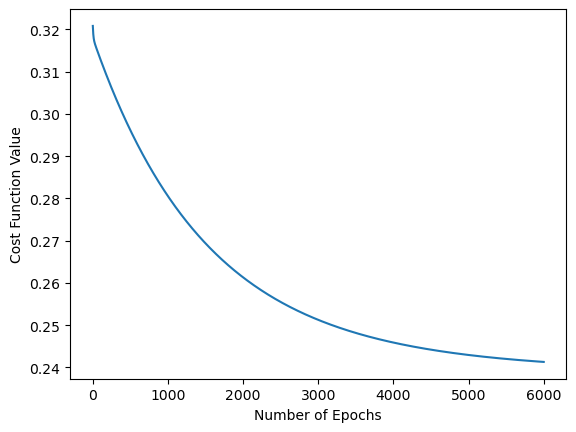

In [80]:
# Plotting the difference in the value of the cost function as the number of epochs increases
plt.plot(range(epochs), cost)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost Function Value')
plt.show()

### Testing the Model

In [82]:
print(f'The mean squared error of the model = {Linear_mse(w,b,x_train,y_train)}')

The mean squared error of the model = 0.2413195589161246


In [84]:
print(f'The mean squared error that the model made on testing data = {Linear_mse(w,b,x_test,y_test)}')

The mean squared error that the model made on testing data = 0.23288479726428796


In [94]:
""" As wee see the error that the model made on the training set and the error that the model made on the testing set
are both small values and close to each others this means that there is no overfitting or underfitting"""

' As wee see the error that the model made on the training set and the error that the model made on the testing set\nare both small values and close to each others this means that there is no overfitting or underfitting'